## Problem 1 : Less data to train

### Solution : Data Augmentation

In [1]:
# import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
if os.path.exists('/content/imageProcessing') == False:
  !git clone https://github.com/amrik220/imageProcessing

In [3]:
# Display output of all code lines in Jupyter notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
# load data labels from the csv file
# data = pd.read_csv('./emergency_class_labels.csv')
data = pd.read_csv('/content/imageProcessing/classify_as_emergency_vehicle/emergency_class_labels.csv')

data.head()
data.shape

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


(2352, 2)

In [5]:
# check class balance
data.emergency_or_not.value_counts()
data.emergency_or_not.value_counts()[1]/data.emergency_or_not.value_counts()[0]*100

0    1361
1     991
Name: emergency_or_not, dtype: int64

72.81410727406319

In [6]:
# to reproduce results
rseed = 220
rng = np.random.RandomState(rseed)

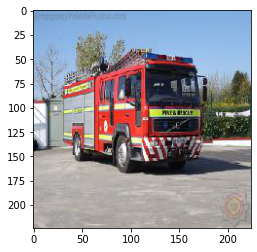

In [7]:
# Select a test image for illustration

random_id = 111 #index of random image 

img_name = data['image_names'].iloc[random_id]
target = data['emergency_or_not'].iloc[random_id]
# img = plt.imread('./images/' + img_name)
img = plt.imread('/content/imageProcessing/classify_as_emergency_vehicle/images/' + img_name)

plt.imshow(img)
plt.show()

In [8]:
# Checking shape of the image

img.shape

(224, 224, 3)

In [9]:
# Import the ImageDataGenerator for Image Augmentation
from keras.preprocessing.image import ImageDataGenerator

### Augmentations

1. rotation_range - Degree range for random rotations
2. width_shift_range - float or integer
3. height_shift_range - float or integer
4. horizontal_flip - Boolean

In [10]:
# Intializ the ImageDataGenerator object with the desired Augmentations

# 1. rotation_range

datagen = ImageDataGenerator(shear_range=0.5)

In [11]:
# Reshape the image to allow for iteration

img = img.reshape((1,)+img.shape)

In [12]:
#check the shape of the reshaped array

img.shape

(1, 224, 224, 3)

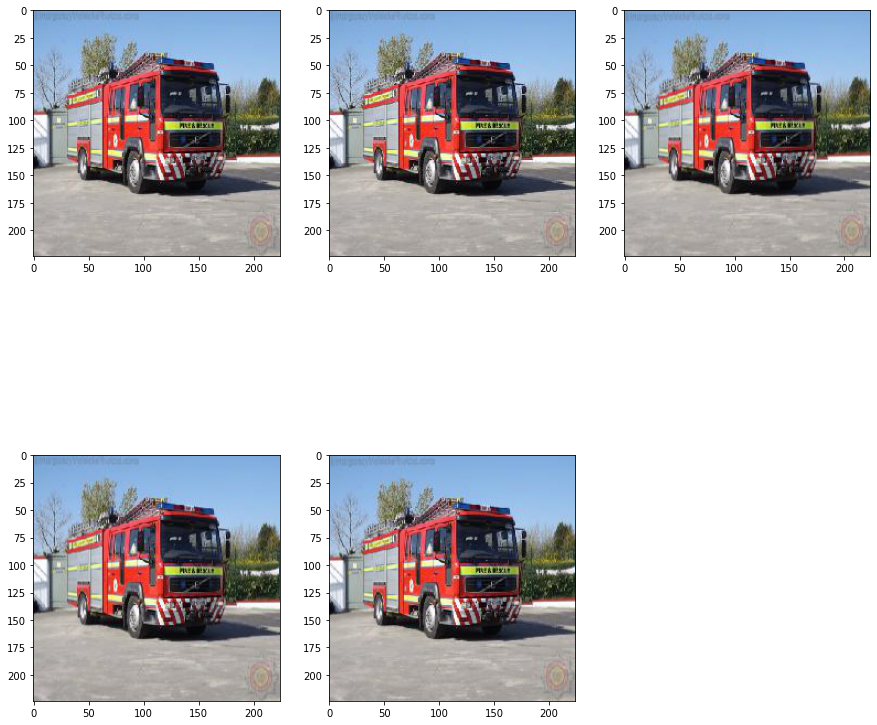

In [13]:
#Let's generate 5 randomly rotated images of our array.

f = plt.figure(figsize = (15,15))

count = 0
for x, y in datagen.flow(img,[target], batch_size=1):
    if count ==5:
        break
    
    count += 1
    f.add_subplot(230+count)
    plt.imshow(x.reshape(224,224,3).astype(int))
plt.show()

## Problem 2 - Variations in Data

In [14]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


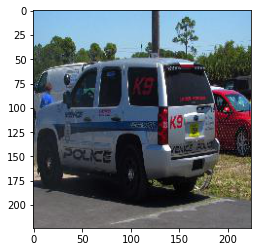

In [15]:
img = plt.imread('/content/imageProcessing/classify_as_emergency_vehicle/images/100.jpg')

plt.imshow(img)
plt.show()

In [16]:
img.shape

(224, 224, 3)

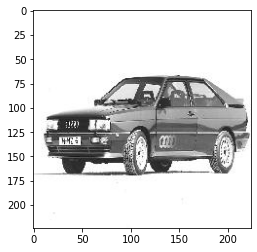

In [17]:
img = plt.imread('/content/imageProcessing/classify_as_emergency_vehicle/images/1000.jpg')

pylab.imshow(img)
pylab.show()

In [18]:
img.shape

(224, 224, 3)

In [19]:
from keras.preprocessing import image

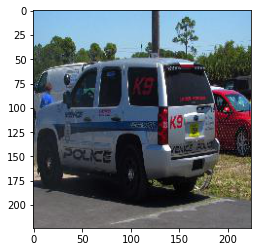

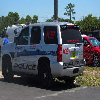

In [20]:
img = plt.imread('/content/imageProcessing/classify_as_emergency_vehicle/images/100.jpg')
pylab.imshow(img)
pylab.show()
image.load_img('/content/imageProcessing/classify_as_emergency_vehicle/images/100.jpg', target_size=(100, 100))

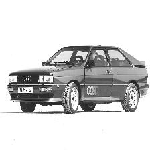

In [21]:
image.load_img('/content/imageProcessing/classify_as_emergency_vehicle/images/1000.jpg', target_size=(150, 150))

## Problem 3 - Overfitting

### Dropout

In [22]:
from keras.layers import Dense
from keras.models import Sequential
from keras.preprocessing import image

from sklearn.model_selection import train_test_split

In [23]:
# load data labels from the csv file
# data = pd.read_csv('./emergency_class_labels.csv')
data = pd.read_csv('/content/imageProcessing/classify_as_emergency_vehicle/emergency_class_labels.csv')

data.head()
data.shape

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


(2352, 2)

In [24]:
images = []
for img_loc in data.image_names:
    img = image.load_img('/content/imageProcessing/classify_as_emergency_vehicle/images/' + img_loc, target_size=(100, 100))
    img = image.img_to_array(img)
    images.append(img)
    
images=np.array(images)

In [25]:
train_x = images.reshape(2352, 100*100*3)

In [26]:
train_x /= train_x.max()
train_y = data.emergency_or_not.values

In [27]:
X_train, X_valid, Y_train, Y_valid=train_test_split(train_x,train_y,test_size=0.3, random_state=rseed)

In [28]:
model=Sequential()

model.add(Dense(100, input_dim=100*100*3, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [29]:
batch = Y_train.shape[0]//10
batch

164

In [30]:
history = model.fit(X_train, Y_train, epochs=500, batch_size=batch, validation_data=(X_valid,Y_valid))

Epoch 1/500
11/11 [==============================] - 1s 74ms/step - loss: 0.6831 - accuracy: 0.5632 - val_loss: 0.6705 - val_accuracy: 0.6076
Epoch 2/500
11/11 [==============================] - 1s 60ms/step - loss: 0.6502 - accuracy: 0.6379 - val_loss: 0.6787 - val_accuracy: 0.6091
Epoch 3/500
11/11 [==============================] - 1s 60ms/step - loss: 0.6437 - accuracy: 0.6355 - val_loss: 0.7947 - val_accuracy: 0.4164
Epoch 4/500
11/11 [==============================] - 1s 60ms/step - loss: 0.6355 - accuracy: 0.6276 - val_loss: 0.6183 - val_accuracy: 0.6657
Epoch 5/500
11/11 [==============================] - 1s 60ms/step - loss: 0.6139 - accuracy: 0.6719 - val_loss: 0.7884 - val_accuracy: 0.4476
Epoch 6/500
11/11 [==============================] - 1s 62ms/step - loss: 0.6217 - accuracy: 0.6622 - val_loss: 0.8093 - val_accuracy: 0.4363
Epoch 7/500
11/11 [==============================] - 1s 61ms/step - loss: 0.6055 - accuracy: 0.6908 - val_loss: 0.8708 - val_accuracy: 0.6091
Epoch 

In [33]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

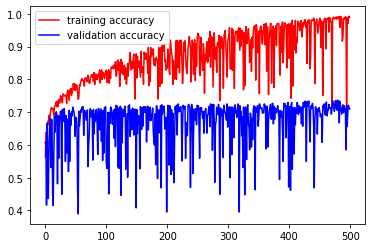

In [34]:
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'b')
plt.legend({'training accuracy': 'r', 'validation accuracy':'b'})
plt.show()

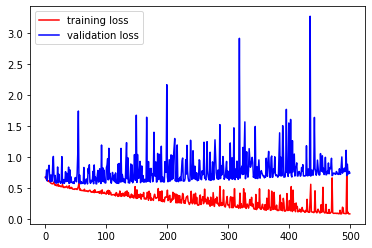

In [35]:
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.legend({'training loss': 'r', 'validation loss':'b'})
plt.show()

In [36]:
from keras.layers import Dropout

In [37]:
model=Sequential()

model.add(Dense(100, input_dim=100*100*3, activation='sigmoid'))
#model.add(Dropout(0.8))
model.add(Dense(50, activation = 'sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [38]:
history = model.fit(X_train, Y_train, epochs=500, batch_size=batch, validation_data=(X_valid,Y_valid))

Epoch 1/500
11/11 [==============================] - 1s 75ms/step - loss: 0.8512 - accuracy: 0.4344 - val_loss: 0.7363 - val_accuracy: 0.3938
Epoch 2/500
11/11 [==============================] - 1s 62ms/step - loss: 0.7076 - accuracy: 0.4672 - val_loss: 0.7049 - val_accuracy: 0.4391
Epoch 3/500
11/11 [==============================] - 1s 61ms/step - loss: 0.6953 - accuracy: 0.5091 - val_loss: 0.6827 - val_accuracy: 0.5737
Epoch 4/500
11/11 [==============================] - 1s 61ms/step - loss: 0.6875 - accuracy: 0.5371 - val_loss: 0.6766 - val_accuracy: 0.5892
Epoch 5/500
11/11 [==============================] - 1s 61ms/step - loss: 0.6848 - accuracy: 0.5510 - val_loss: 0.6717 - val_accuracy: 0.5992
Epoch 6/500
11/11 [==============================] - 1s 60ms/step - loss: 0.6835 - accuracy: 0.5553 - val_loss: 0.6695 - val_accuracy: 0.6020
Epoch 7/500
11/11 [==============================] - 1s 62ms/step - loss: 0.6816 - accuracy: 0.5589 - val_loss: 0.6686 - val_accuracy: 0.5992
Epoch 

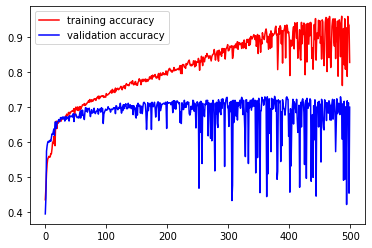

In [39]:
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'b')
plt.legend({'training accuracy': 'r', 'validation accuracy':'b'})
plt.show()

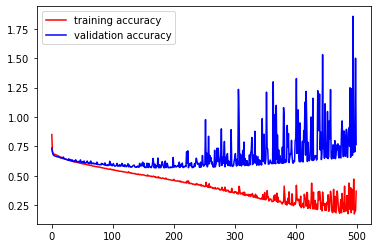

In [40]:
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.legend({'training accuracy': 'r', 'validation accuracy':'b'})
plt.show()

In [41]:
model=Sequential()

model.add(Dense(100, input_dim=100*100*3, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(50, activation = 'sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [42]:
history = model.fit(X_train, Y_train, epochs=500, batch_size=batch, validation_data=(X_valid,Y_valid))

Epoch 1/500
11/11 [==============================] - 1s 71ms/step - loss: 0.6861 - accuracy: 0.5535 - val_loss: 0.6677 - val_accuracy: 0.6091
Epoch 2/500
11/11 [==============================] - 1s 62ms/step - loss: 0.6816 - accuracy: 0.5674 - val_loss: 0.6632 - val_accuracy: 0.6091
Epoch 3/500
11/11 [==============================] - 1s 64ms/step - loss: 0.6808 - accuracy: 0.5753 - val_loss: 0.6640 - val_accuracy: 0.6091
Epoch 4/500
11/11 [==============================] - 1s 61ms/step - loss: 0.6766 - accuracy: 0.5790 - val_loss: 0.6598 - val_accuracy: 0.6091
Epoch 5/500
11/11 [==============================] - 1s 60ms/step - loss: 0.6774 - accuracy: 0.5820 - val_loss: 0.6604 - val_accuracy: 0.6261
Epoch 6/500
11/11 [==============================] - 1s 60ms/step - loss: 0.6718 - accuracy: 0.5936 - val_loss: 0.6557 - val_accuracy: 0.6147
Epoch 7/500
11/11 [==============================] - 1s 60ms/step - loss: 0.6700 - accuracy: 0.5954 - val_loss: 0.6521 - val_accuracy: 0.6105
Epoch 

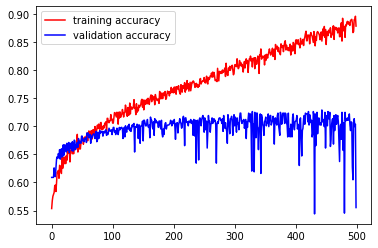

In [43]:
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'b')
plt.legend({'training accuracy': 'r', 'validation accuracy':'b'})
plt.show()

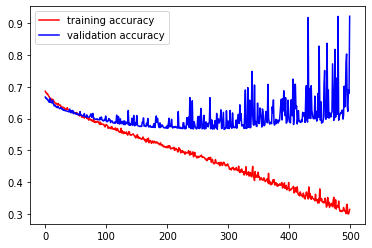

In [44]:
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.legend({'training accuracy': 'r', 'validation accuracy':'b'})
plt.show()

In [45]:
model=Sequential()

model.add(Dense(100, input_dim=100*100*3, activation='sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(50, activation = 'sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [46]:
history = model.fit(X_train, Y_train, epochs=500, batch_size=batch, validation_data=(X_valid,Y_valid))

Epoch 1/500
11/11 [==============================] - 1s 73ms/step - loss: 0.8626 - accuracy: 0.4563 - val_loss: 0.7121 - val_accuracy: 0.4093
Epoch 2/500
11/11 [==============================] - 1s 62ms/step - loss: 0.7256 - accuracy: 0.4988 - val_loss: 0.6801 - val_accuracy: 0.5793
Epoch 3/500
11/11 [==============================] - 1s 61ms/step - loss: 0.7178 - accuracy: 0.5207 - val_loss: 0.6759 - val_accuracy: 0.5935
Epoch 4/500
11/11 [==============================] - 1s 60ms/step - loss: 0.7208 - accuracy: 0.5152 - val_loss: 0.6706 - val_accuracy: 0.6020
Epoch 5/500
11/11 [==============================] - 1s 61ms/step - loss: 0.7186 - accuracy: 0.5322 - val_loss: 0.6724 - val_accuracy: 0.5963
Epoch 6/500
11/11 [==============================] - 1s 62ms/step - loss: 0.7032 - accuracy: 0.5450 - val_loss: 0.6747 - val_accuracy: 0.5878
Epoch 7/500
11/11 [==============================] - 1s 59ms/step - loss: 0.7136 - accuracy: 0.5152 - val_loss: 0.6702 - val_accuracy: 0.6006
Epoch 

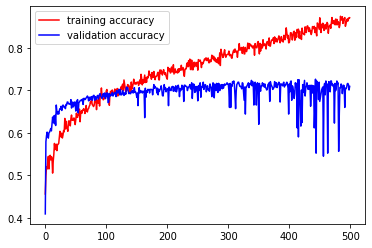

In [47]:
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'b')
plt.legend({'training accuracy': 'r', 'validation accuracy':'b'})
plt.show()

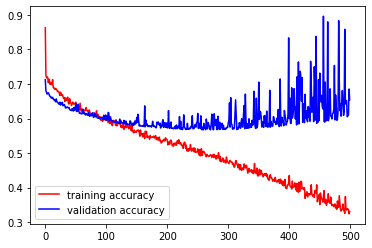

In [48]:
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.legend({'training accuracy': 'r', 'validation accuracy':'b'})
plt.show()

### Early Stopping

In [49]:
model=Sequential()

model.add(Dense(100, input_dim=100*100*3, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [50]:
from keras.callbacks import EarlyStopping

In [51]:
estop = EarlyStopping(monitor='val_accuracy', patience=10)

In [52]:
history = model.fit(X_train, Y_train, epochs=1000, batch_size=batch, validation_data=(X_valid,Y_valid), callbacks=[estop])

Epoch 1/1000
11/11 [==============================] - 1s 69ms/step - loss: 0.7040 - accuracy: 0.5522 - val_loss: 1.0027 - val_accuracy: 0.3909
Epoch 2/1000
11/11 [==============================] - 1s 61ms/step - loss: 0.6706 - accuracy: 0.6142 - val_loss: 0.6268 - val_accuracy: 0.6402
Epoch 3/1000
11/11 [==============================] - 1s 59ms/step - loss: 0.6259 - accuracy: 0.6525 - val_loss: 0.7349 - val_accuracy: 0.6076
Epoch 4/1000
11/11 [==============================] - 1s 61ms/step - loss: 0.6259 - accuracy: 0.6586 - val_loss: 0.7278 - val_accuracy: 0.5227
Epoch 5/1000
11/11 [==============================] - 1s 61ms/step - loss: 0.6118 - accuracy: 0.6640 - val_loss: 0.7507 - val_accuracy: 0.6076
Epoch 6/1000
11/11 [==============================] - 1s 60ms/step - loss: 0.6105 - accuracy: 0.6847 - val_loss: 0.6479 - val_accuracy: 0.6261
Epoch 7/1000
11/11 [==============================] - 1s 61ms/step - loss: 0.5893 - accuracy: 0.6896 - val_loss: 0.6065 - val_accuracy: 0.6912

## Problem 5 - Large amount of training time

### BatchNormalization

In [53]:
from keras.layers import BatchNormalization

In [54]:
model=Sequential()

model.add(Dense(100, input_dim=100*100*3, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [55]:
history = model.fit(X_train, Y_train, epochs=50, batch_size=batch, validation_data=(X_valid,Y_valid))

Epoch 1/50
11/11 [==============================] - 1s 74ms/step - loss: 0.8263 - accuracy: 0.6185 - val_loss: 0.6271 - val_accuracy: 0.6856
Epoch 2/50
11/11 [==============================] - 1s 62ms/step - loss: 0.5577 - accuracy: 0.7217 - val_loss: 0.7737 - val_accuracy: 0.6091
Epoch 3/50
11/11 [==============================] - 1s 63ms/step - loss: 0.5514 - accuracy: 0.7479 - val_loss: 0.8079 - val_accuracy: 0.3924
Epoch 4/50
11/11 [==============================] - 1s 61ms/step - loss: 0.4609 - accuracy: 0.7922 - val_loss: 0.6336 - val_accuracy: 0.6657
Epoch 5/50
11/11 [==============================] - 1s 59ms/step - loss: 0.3911 - accuracy: 0.8366 - val_loss: 0.7058 - val_accuracy: 0.5368
Epoch 6/50
11/11 [==============================] - 1s 61ms/step - loss: 0.4106 - accuracy: 0.8311 - val_loss: 0.6341 - val_accuracy: 0.6346
Epoch 7/50
11/11 [==============================] - 1s 60ms/step - loss: 0.3884 - accuracy: 0.8372 - val_loss: 0.6050 - val_accuracy: 0.6997
Epoch 8/50
11